**Vector Spaces Hands-on Project**

In [1]:
import pandas as pd
import csv
import numpy as np
import pickle
import matplotlib.pyplot as plt

Load the pretrained Model

(word_embeddings_subset.p is a pretrained word embedding)

In [2]:
word_embeddings = pickle.load(open('word_embeddings_subset.p', 'rb'))
print(len(word_embeddings))

243


In [3]:
country_vec = word_embeddings['country']
print(type(country_vec))
print(country_vec.shape)

<class 'numpy.ndarray'>
(300,)


In [4]:
def get_vector(word):
    return word_embeddings[word]

In [5]:
my_words = ['oil', 'gas', 'happy', 'sad', 'city', 'town', 'village', 'country', 'continent', 'petroleum', 'joyful']

bag2d = np.array([get_vector(word) for word in my_words])

In [6]:
print(type(bag2d))
print(bag2d.shape)

<class 'numpy.ndarray'>
(11, 300)


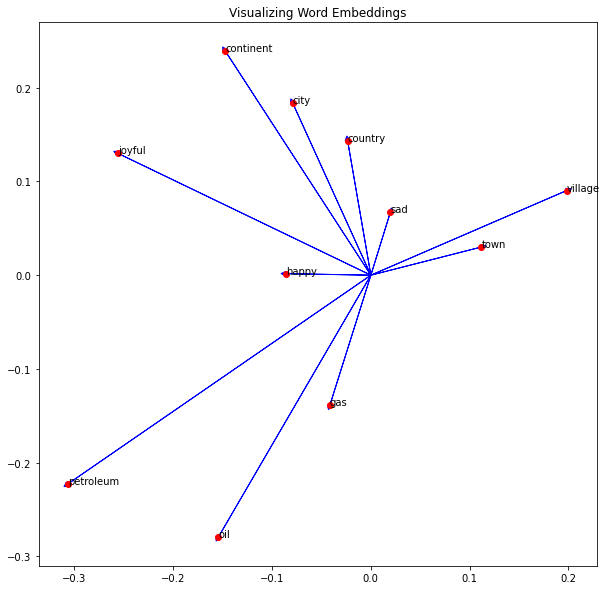

In [7]:
fig, ax = plt.subplots(figsize = (10, 10))

col1 = 5
col2 = 2

for word in bag2d:
    ax.arrow(0, 0, word[col1], word[col2], head_width=0.005, head_length=0.005, fc='b', ec='b', width = 1e-5)

ax.scatter(bag2d[:, col1], bag2d[:, col2], color='r');

# Add the word label over each dot in the scatter plot
for i in range(0, len(my_words)):
    ax.annotate(my_words[i], (bag2d[i, col1], bag2d[i, col2]))

plt.title('Visualizing Word Embeddings')
plt.show()

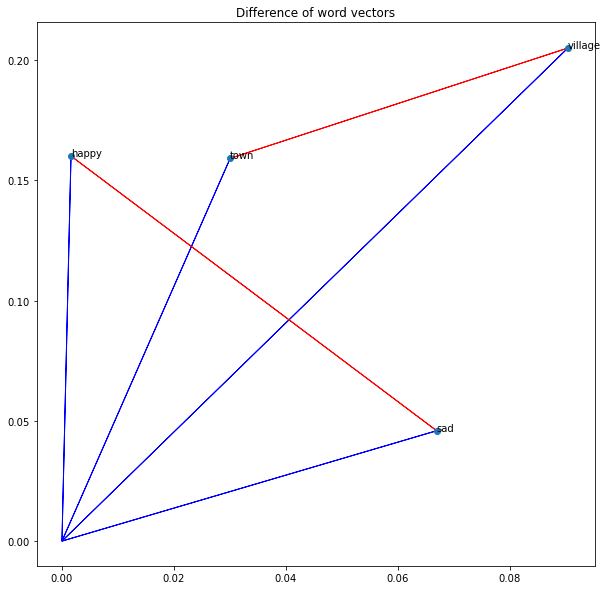

In [8]:
my_words2 = ['sad', 'happy', 'town', 'village']

bag2d = np.array([get_vector(word) for word in my_words2])

fig, ax = plt.subplots(figsize = (10,10))

col1 = 2
col2 = 1

for word in bag2d:
    ax.arrow(0, 0, word[col1], word[col2], head_width=5e-4, head_length=5e-4, fc='b', ec='b', width = 1e-5)
    
village = get_vector('village')
town = get_vector('town')
sad = get_vector('sad')
happy = get_vector('happy')

diff1 = town - village; diff2 = happy - sad;

ax.arrow(village[col1], village[col2], diff1[col1], diff1[col2], fc='r', ec='r', width=1e-5)
ax.arrow(sad[col1], sad[col2], diff2[col1], diff2[col2], fc='r', ec='r', width=1e-5)

ax.scatter(bag2d[:,col1], bag2d[:,col2]);

for i in range(len(my_words2)):
    ax.annotate(my_words2[i], (bag2d[i, col1], bag2d[i,col2]))

plt.title('Difference of word vectors')
plt.show()

In [9]:
print(np.linalg.norm(sad))
print(np.linalg.norm(happy))
print(np.linalg.norm(village))
print(np.linalg.norm(town))

2.900484
2.466733
2.8267016
2.3858097


Predicting capitals using linear algebra on word vectors - I

In [10]:
capital = get_vector('France') - get_vector('Paris')
country = get_vector('Madrid') + capital

print(country[:5])

[-0.02905273 -0.2475586   0.53952026  0.20581055 -0.14862823]


In [11]:
diff = country - get_vector('Spain')
print(diff[:5])

[-0.06054688 -0.06494141  0.37643433  0.08129883 -0.13007355]


In [12]:
keys = word_embeddings.keys()
data = []
for key in keys:
    data.append(word_embeddings[key])
    
print('(',len(data),',',len(data[0]),')')

( 243 , 300 )


In [13]:
embeddings = pd.DataFrame(data=data,index=keys)
embeddings.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
country,-0.080078,0.133789,0.143555,0.094727,-0.047363,-0.023560,-0.008545,-0.186523,0.045898,-0.081543,...,-0.145508,0.067383,-0.244141,-0.077148,0.047607,-0.075195,-0.149414,-0.044189,0.097168,0.067383
city,-0.010071,0.057373,0.183594,-0.040039,-0.029785,-0.079102,0.071777,0.013306,-0.143555,0.011292,...,0.024292,-0.168945,-0.062988,0.117188,-0.020508,0.030273,-0.247070,-0.122559,0.076172,-0.234375
China,-0.073242,0.135742,0.108887,0.083008,-0.127930,-0.227539,0.151367,-0.045654,-0.065430,0.034424,...,0.140625,0.087402,0.152344,0.079590,0.006348,-0.037842,-0.183594,0.137695,0.093750,-0.079590
Iraq,0.191406,0.125000,-0.065430,0.060059,-0.285156,-0.102539,0.117188,-0.351562,-0.095215,0.200195,...,-0.100586,-0.077148,-0.123047,0.193359,-0.153320,0.089355,-0.173828,-0.054688,0.302734,0.105957
oil,-0.139648,0.062256,-0.279297,0.063965,0.044434,-0.154297,-0.184570,-0.498047,0.047363,0.110840,...,-0.195312,-0.345703,0.217773,-0.091797,0.051025,0.061279,0.194336,0.204102,0.235352,-0.051025


In [14]:
def find_closest(v):
    diff = embeddings.values - v
    delta = np.sum(diff*diff, axis=1)
    i = np.argmin(delta)
    return embeddings.iloc[i].name

In [15]:
find_closest(country)

'Spain'

In [16]:
find_closest(get_vector('Italy') - get_vector('Rome') + get_vector('Madrid'))

'Spain'

In [17]:
find_closest(get_vector('Berlin') + capital)

'Germany'

In [18]:
find_closest(get_vector('Beijing') + capital)

'China'

Predicting Word Capitals II

In [19]:
def get_vector_mat(embeddings, words):
    
    m = len(words)
    X = np.zeros((1, 300))
    for word in words:
        english = word
        eng_emb = embeddings[english]
        X = np.row_stack((X, eng_emb))
    X = X[1:,:]
    return X

In [21]:
data = pd.read_csv('capitals.txt', delimiter = ' ')
data.columns = ['city1', 'country1', 'city2', 'country2']

data.head()

,city1,country1,city2,country2
0,Athens,Greece,Bangkok,Thailand
1,Athens,Greece,Beijing,China
2,Athens,Greece,Berlin,Germany
3,Athens,Greece,Bern,Switzerland
4,Athens,Greece,Cairo,Egypt


Cosine Similarity function

In [23]:
def cosine(A,B):
    dot = np.dot(A,B)
    norm = np.linalg.norm(A) * np.linalg.norm(B)
    cos = dot / norm
    return cos

In [26]:
king = get_vector('king')
queen = get_vector('queen')
print(cosine(king,queen))

0.6510957


In [27]:
def euclidean(A,B):
    d = np.linalg.norm(A-B)
    return d

In [28]:
print(euclidean(king,queen))

2.4796925


In [29]:
def get_country(city1, country1, city2, emb):
    group = set((city1, country1, city2))
    
    city1_emb = get_vector(city1)
    country1_emb = get_vector(country1)
    city2_emb = get_vector(city2)
    
    pred_vec = country1_emb - city1_emb + city2_emb
    
    sim = -1
    country = ''
    
    for word in emb.keys():
        if word not in group:
            word_vec = get_vector(word)
            cos_sim = cosine(pred_vec,word_vec)
            
            if cos_sim > sim:
                sim = cos_sim
                country = (word,sim)
    
    return country
            

In [30]:
print(get_country('Athens','Greece','Cairo',word_embeddings))

('Egypt', 0.7626821)


Model Accuracy

In [41]:
def get_accuracy(emb, data):
    
    num_correct = 0
    accuracy = 0
    
    for i, row in data.iterrows():
        
        city1 = row.city1
        country1 = row.country1
        city2 = row.city2
        country2 = row.country2
        
        pred_country, sim = get_country(city1, country1, city2, emb)
        
        if pred_country == country2:
            num_correct = num_correct + 1
        
    m = len(data)
    accuracy = num_correct / m
    
    return accuracy

In [46]:
accuracy = get_accuracy(word_embeddings, data)
print("The accuracy is", accuracy)

The accuracy is 0.9192082407594425


Visualizing Data using Principal Component Analysis

In [47]:
def pca_func(X, n_comp=2):
    
    X_center = X - np.mean(X, axis=0)
    covar_mat = np.cov(X_center, rowvar = False)
    eigen_vals, eigen_vec = np.linalg.eigh(covar_mat, UPLO='L')
    
    idx_sort = np.argsort(eigen_vals)
    idx_final = idx_sort[::-1]
    
    eigen_vals = eigen_vals[idx_final]
    eigen_vec = eigen_vec[:, idx_final]
    
    final_eigen_vec = eigen_vec[:,:n_comp]
    X_red = np.dot(final_eigen_vec.T, X_center.T).T
    
    return X_red

In [49]:
#Testing the pca_fun() function
np.random.seed(1)
X = np.random.rand(3,10)
X_reduced = pca_func(X, n_comp=2)
print("Your original matrix was "+ str(X.shape) + " and it became:")
print(X_reduced)

Your original matrix was (3, 10) and it became:
[[ 0.43437323  0.49820384]
 [ 0.42077249 -0.50351448]
 [-0.85514571  0.00531064]]


In [50]:
X = get_vector_mat(word_embeddings, my_words)
print(X.shape)

(11, 300)


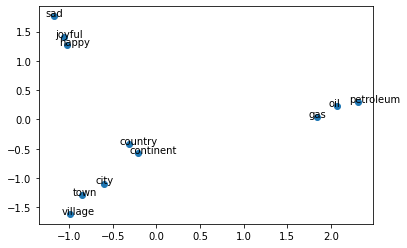

In [51]:
result= pca_func(X, 2)
plt.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(my_words):
    plt.annotate(word, xy=(result[i, 0]-0.1, result[i, 1]))
plt.show()